# Thực hành Buổi 2

https://www.kaggle.com/code/delllectron/bees-ants-classification-pytorch

In [4]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import os
import copy
import kagglehub
import shutil
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [5]:

# Tải dataset từ Kaggle
dataset_path = kagglehub.dataset_download("subediaarjun/ant-and-bee")

# Đặt thư mục hiện tại làm nơi lưu dataset
data_dir = "./"  # Thư mục hiện tại

# Di chuyển toàn bộ dữ liệu vào thư mục hiện tại
for item in os.listdir(dataset_path):
    src_path = os.path.join(dataset_path, item)
    dest_path = os.path.join(data_dir, item)
    
    if os.path.isdir(src_path):
        shutil.move(src_path, dest_path)
    else:
        shutil.move(src_path, data_dir)

print("Dữ liệu đã được di chuyển vào thư mục hiện tại.")


100%|██████████| 45.1M/45.1M [00:04<00:00, 11.1MB/s]

Extracting model files...


Dữ liệu đã được di chuyển vào thư mục hiện tại.


In [6]:
#data transformations
data_transforms = {
    'train': transforms.Compose([
      transforms.Resize((256,256)),
      transforms.ToTensor(),
      #normalize the images, set the mean and std
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'val': transforms.Compose([
      transforms.Resize((256,256)),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [7]:
#load train and val data
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size = 4,
                                              shuffle = True, num_workers = 4)
               for x in ['train', 'val']}

In [8]:
#set gpu device to store the tensors, if none use gpu
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
classes = image_datasets['train'].classes
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(dataset_sizes)
print(device)

{'train': 244, 'val': 153}
cpu


In [9]:
#function to show images
def imshow(inp, title = None):
  inp = inp.numpy().transpose((1,2,0))
  mean = [0.485, 0.456, 0.406]
  std = [0.229, 0.224, 0.225]
  inp = std + inp * mean
  inp = np.clip(inp,0,1)
  plt.figure(figsize = (14,5))
  plt.imshow(inp);
  if title is not None:
    plt.title(title);

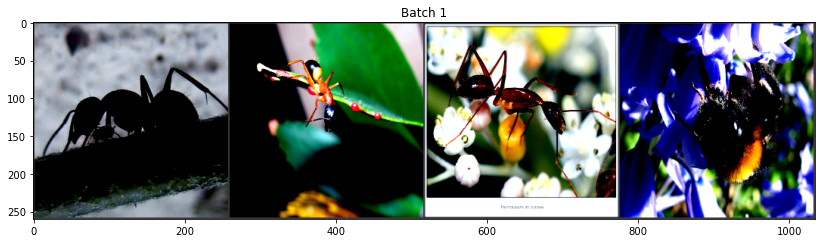

In [10]:
#show sample batch of images
images, labels = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(images)

imshow(out, 'Batch 1')